#**Boom Bike Sharing Case Study**

**Problem Statement:**

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, they have decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

Essentially the company wants :

    To understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19, by creating a linear model.
    To identify the variables affecting their revenues i.e. Which variables are significant in predicting the demand for shared bikes.
    To know the accuracy of the model, i.e. How well those variables describe the bike demands

They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

Step 1: Uploading Dataset and Understanding the Data

In [53]:
#Importing the necessary modules
import pandas as pd
import numpy as np

In [54]:
bike_df = pd.read_csv('/content/day.csv')
bike_df.head(n = 20)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


**Information about the Dataset**

In [55]:
bike_df.shape

(730, 16)

In [56]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [57]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In the Bike Prediction dataset there are a total of 730 rows and 16 columns in which we need to use the 'CNT' column for the prediction purposes.

**Data Cleaning Process**

In [58]:
# percentage of missing values in each column
round(100*(bike_df.isnull().sum()/len(bike_df)), 2).sort_values(ascending=False)

,0
instant,0.0
dteday,0.0
season,0.0
yr,0.0
mnth,0.0
holiday,0.0
weekday,0.0
workingday,0.0
weathersit,0.0
temp,0.0


In [59]:
# percentage of missing values in each row
round(100*(bike_df.isnull().sum(axis=1)/len(bike_df)), 2).sort_values(ascending=False)

,0
0,0.0
479,0.0
481,0.0
482,0.0
483,0.0
...,...
245,0.0
246,0.0
247,0.0
248,0.0


**Observed this is a clean dataset having no missing/null value**

In [60]:
# Checking for duplicate values

bike_copy = bike_df.copy()

# Checking for duplicates and dropping the entire duplicate row if any
bike_copy.drop_duplicates(subset=None, inplace=True)
bike_copy.shape

(730, 16)

In [61]:
bike_df.shape

(730, 16)

Hence observed there is no duplicate value present in the dataset

**Droping unnecessary columns**

In [62]:
bike_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [63]:
bike_df_new = bike_df[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]

In [64]:
bike_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


#Step 2: Visualising the Data

We will do the followings analysis:

    We would be able to check if all the variables are linearly related or not (important if we want to proceed with a linear model)
    Checking if there are any multicollinearity that exist
    Here's where we can also identify if some predictors directly have a strong association(correlation) with the outcome variable
We will use matplotlib and seaborn for this.


In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

Visualising Numeric Variables : Using a pairplot

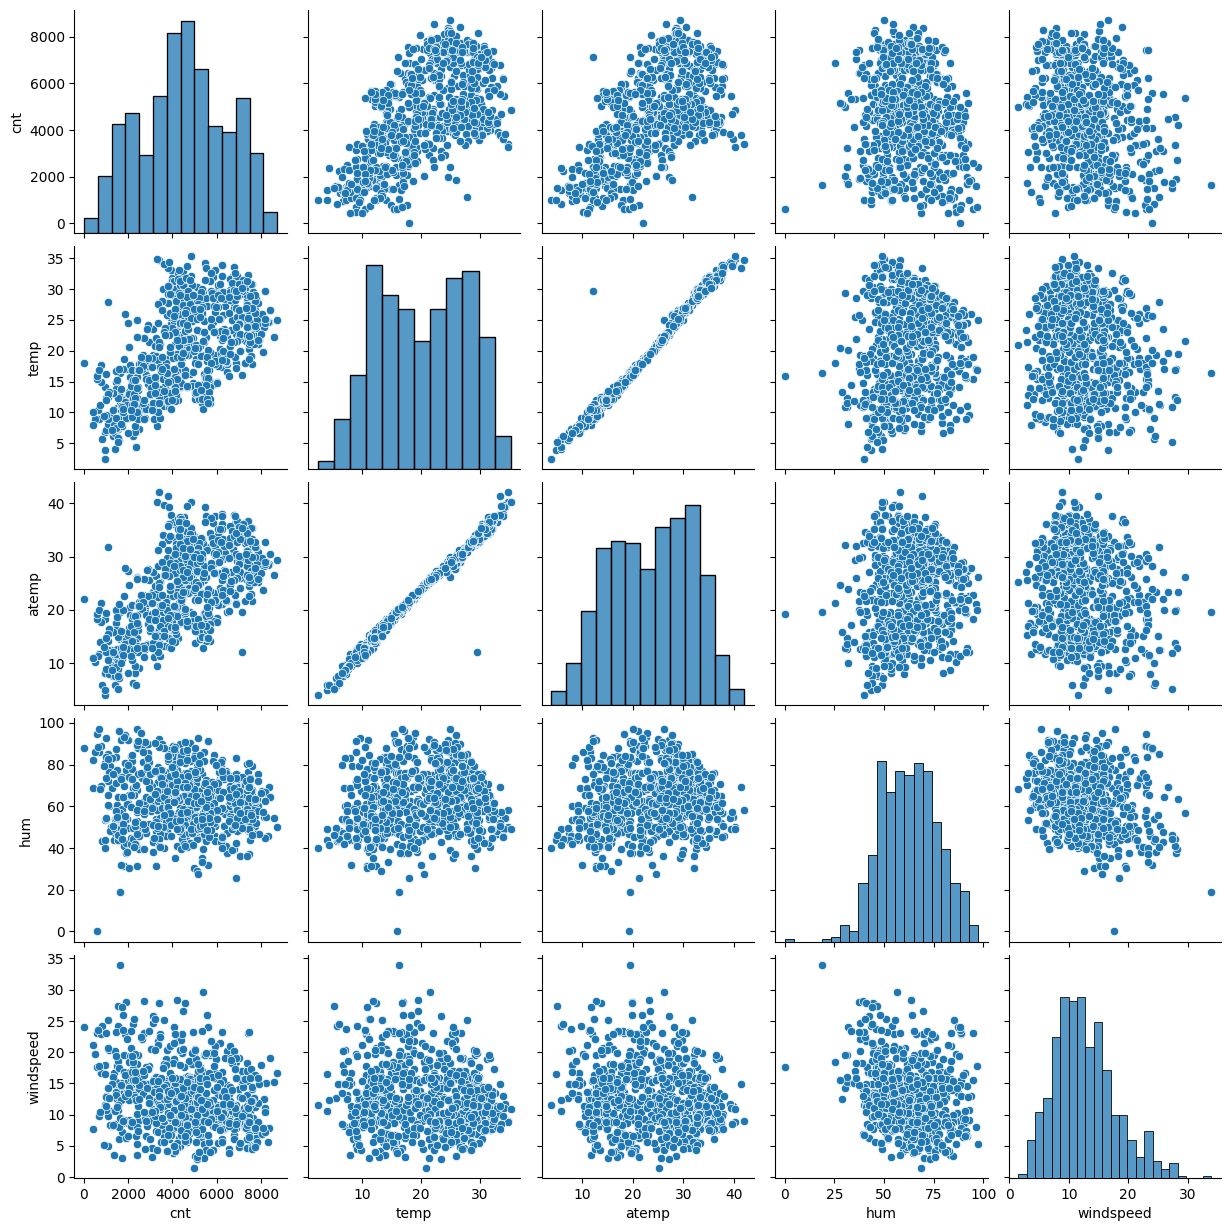

In [66]:
sns.pairplot(data=bike_df_new, vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

 Insights:

By visualising the numeric variables, we can conclude that a linear model can be considered in this case because there are atleast some independent variables like atemp , temp etc. that show a positive correlation with the target variable cnt .


Visualising Categorical Variables : Using a boxplot

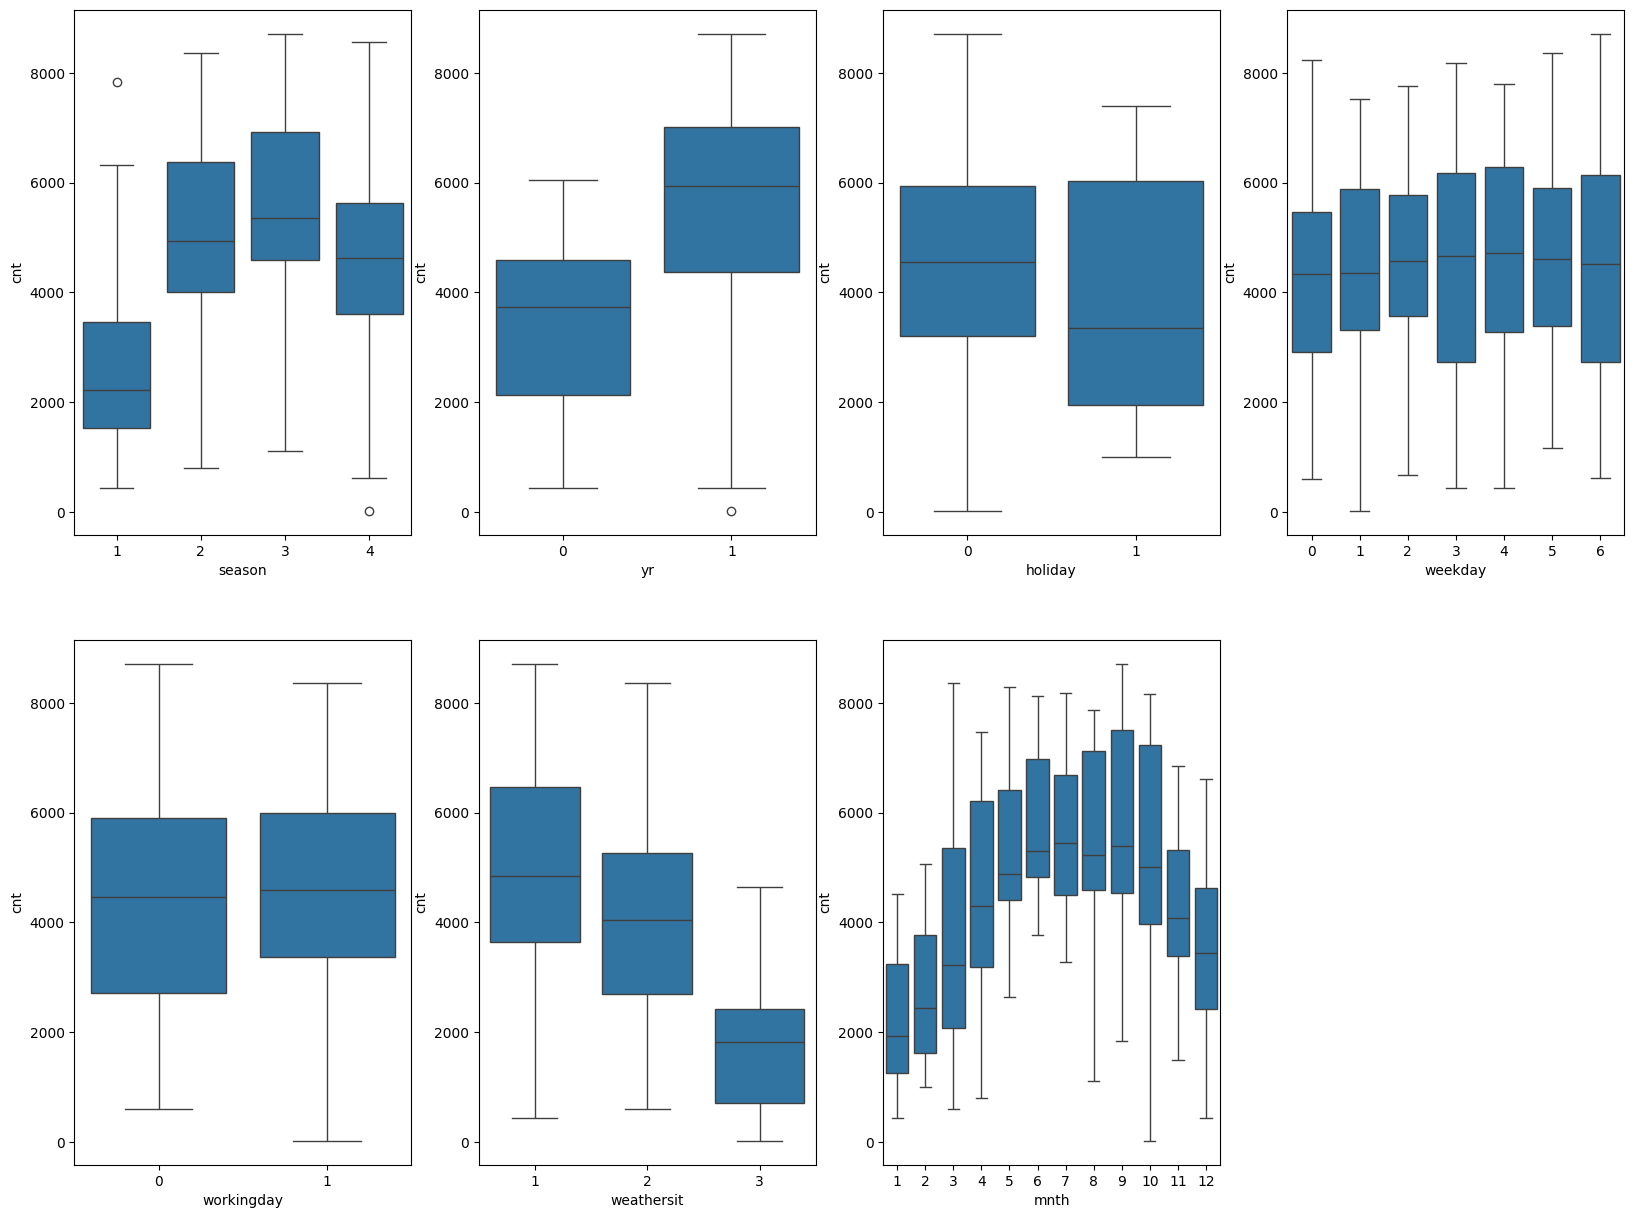

In [67]:
plt.figure(figsize=(20, 15))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_df_new)
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_df_new)
plt.subplot(2,4,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_df_new)
plt.subplot(2,4,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_df_new)
plt.subplot(2,4,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_df_new)
plt.subplot(2,4,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_df_new)
plt.subplot(2,4,7)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_df_new)
plt.show()

Insights:


*   The graph clearly shows the qualitative distributions of the data, now if the model suggests the important predictors, using these graphs we can be more confident about the predictions of the model.
*   For the variable season, we can clearly see that the category 3 : Fall, has the highest median, which shows that the demand was high during this season. It is least for 1: spring.


*   The year 2019 had a higher count of users as compared to the year 2018.
*  The count of rentals is almost even throughout the week.


*   There are no users when there is heavy rain/ snow indicating that this weather is quite adverse. Highest count was seen when the weather situation was Clear, Partly Cloudy.
*   The number of rentals peaked in September, whereas they peaked in December. This observation is consistent with the observations made regarding the weather. As a result of the typical substantial snowfall in December, rentals may have declined.


*   The count of users is less during the holidays.
*   From the "Workingday" boxplot we can see those maximum bookings happening between 4000 and 6000, that is the median count of users is constant almost throughout the week. There is not much of difference in booking whether its working day or not.








#Step 3: Data Preparation

**Mapping the categorical values to their respective categorical string values (reference data dictionary)**

In [68]:
# Encoding/mapping the season column

bike_df_new.season = bike_df_new.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

<ipython-input-68-f59ca1d7be0f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_df_new.season = bike_df_new.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})


In [69]:
# Encoding/mapping the month column
bike_df_new.mnth = bike_df_new.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

<ipython-input-69-db8f36705c40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_df_new.mnth = bike_df_new.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})


In [70]:
bike_df_new.weekday =bike_df_new.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

<ipython-input-70-ec23d18f596d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_df_new.weekday =bike_df_new.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})


In [71]:
# Encoding/mapping the weathersit column

bike_df_new.weathersit = bike_df_new.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

<ipython-input-71-7db8620414d2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_df_new.weathersit = bike_df_new.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})


In [72]:
# check the head of the dataset

bike_df_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


Creating Dummy Variables

The variables mnth weekday season weathersit have various levels, for ex, weathersit has 3 levels , similarly variable mnth has 12 levels.
We will create DUMMY variables for these 4 categorical variables namely - mnth, weekday, season & weathersit.


In [73]:
# Get the dummy variables for the features ''season','mnth','weekday','weathersit'' and store it in a new variable - 'dummy'
dummy = bike_df_new[['season','mnth','weekday','weathersit']]

In [74]:
dummy = pd.get_dummies(dummy,drop_first=True)

In [75]:
bike_df_new = pd.concat([dummy,bike_df_new],axis = 1)

In [76]:
bike_df_new.drop(['season', 'weathersit', 'weekday', 'mnth'],axis=1,inplace=True)

In [77]:
bike_df_new.head()

,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_july,mnth_june,mnth_mar,...,weathersit_Light_snowrain,weathersit_Misty,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,True,False,False,False,False,False,True,False,False,False,...,False,True,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,True,False,False,False,False,False,True,False,False,False,...,False,True,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,True,False,False,False,False,False,True,False,False,False,...,False,False,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,True,False,False,False,False,False,True,False,False,False,...,False,False,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,True,False,False,False,False,False,True,False,False,False,...,False,False,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [78]:
bike_df_new.shape

(730, 30)

In [79]:
bike_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   season_spring              730 non-null    bool   
 1   season_summer              730 non-null    bool   
 2   season_winter              730 non-null    bool   
 3   mnth_aug                   730 non-null    bool   
 4   mnth_dec                   730 non-null    bool   
 5   mnth_feb                   730 non-null    bool   
 6   mnth_jan                   730 non-null    bool   
 7   mnth_july                  730 non-null    bool   
 8   mnth_june                  730 non-null    bool   
 9   mnth_mar                   730 non-null    bool   
 10  mnth_may                   730 non-null    bool   
 11  mnth_nov                   730 non-null    bool   
 12  mnth_oct                   730 non-null    bool   
 13  mnth_sep                   730 non-null    bool   

#Step 4: Splitting the Data into Training and Testing Sets

The first basic step for regression is performing a train-test split.


In [80]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(bike_df_new, train_size = 0.7, random_state = 100)

In [81]:
print(train.shape)
print(test.shape)

(510, 30)
(220, 30)


Step 5: Rescaling the Features

Although scaling doesn't impact the linear model in the case of simple linear regression, however while performing multiplwe linear regression it might impact the model. As we can see that the value of the feature cnt has much higher values as compared to the other features like temp, atemp etc. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. There are two common ways of rescaling:

    Min-Max scaling
    Standardisation (mean-0, sigma-1)

This time, we will use MinMax scaling.


In [82]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [83]:
# Apply scaler() to all the columns except the 'dummy' variables.
num_vars = ['cnt','hum','windspeed','temp','atemp']

train[num_vars] = scaler.fit_transform(train[num_vars])

In [84]:
train.head()

,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_july,mnth_june,mnth_mar,...,weathersit_Light_snowrain,weathersit_Misty,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
576,False,False,False,False,False,False,False,True,False,False,...,False,False,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,True,False,False,False,False,False,False,False,False,True,...,False,True,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,True,False,False,False,True,False,False,False,False,False,...,False,False,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096
482,False,True,False,False,False,False,False,False,False,False,...,False,True,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973
111,False,True,False,False,False,False,False,False,False,False,...,False,True,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095


In [85]:
train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


 coefficients check to see which variables are highly correlated

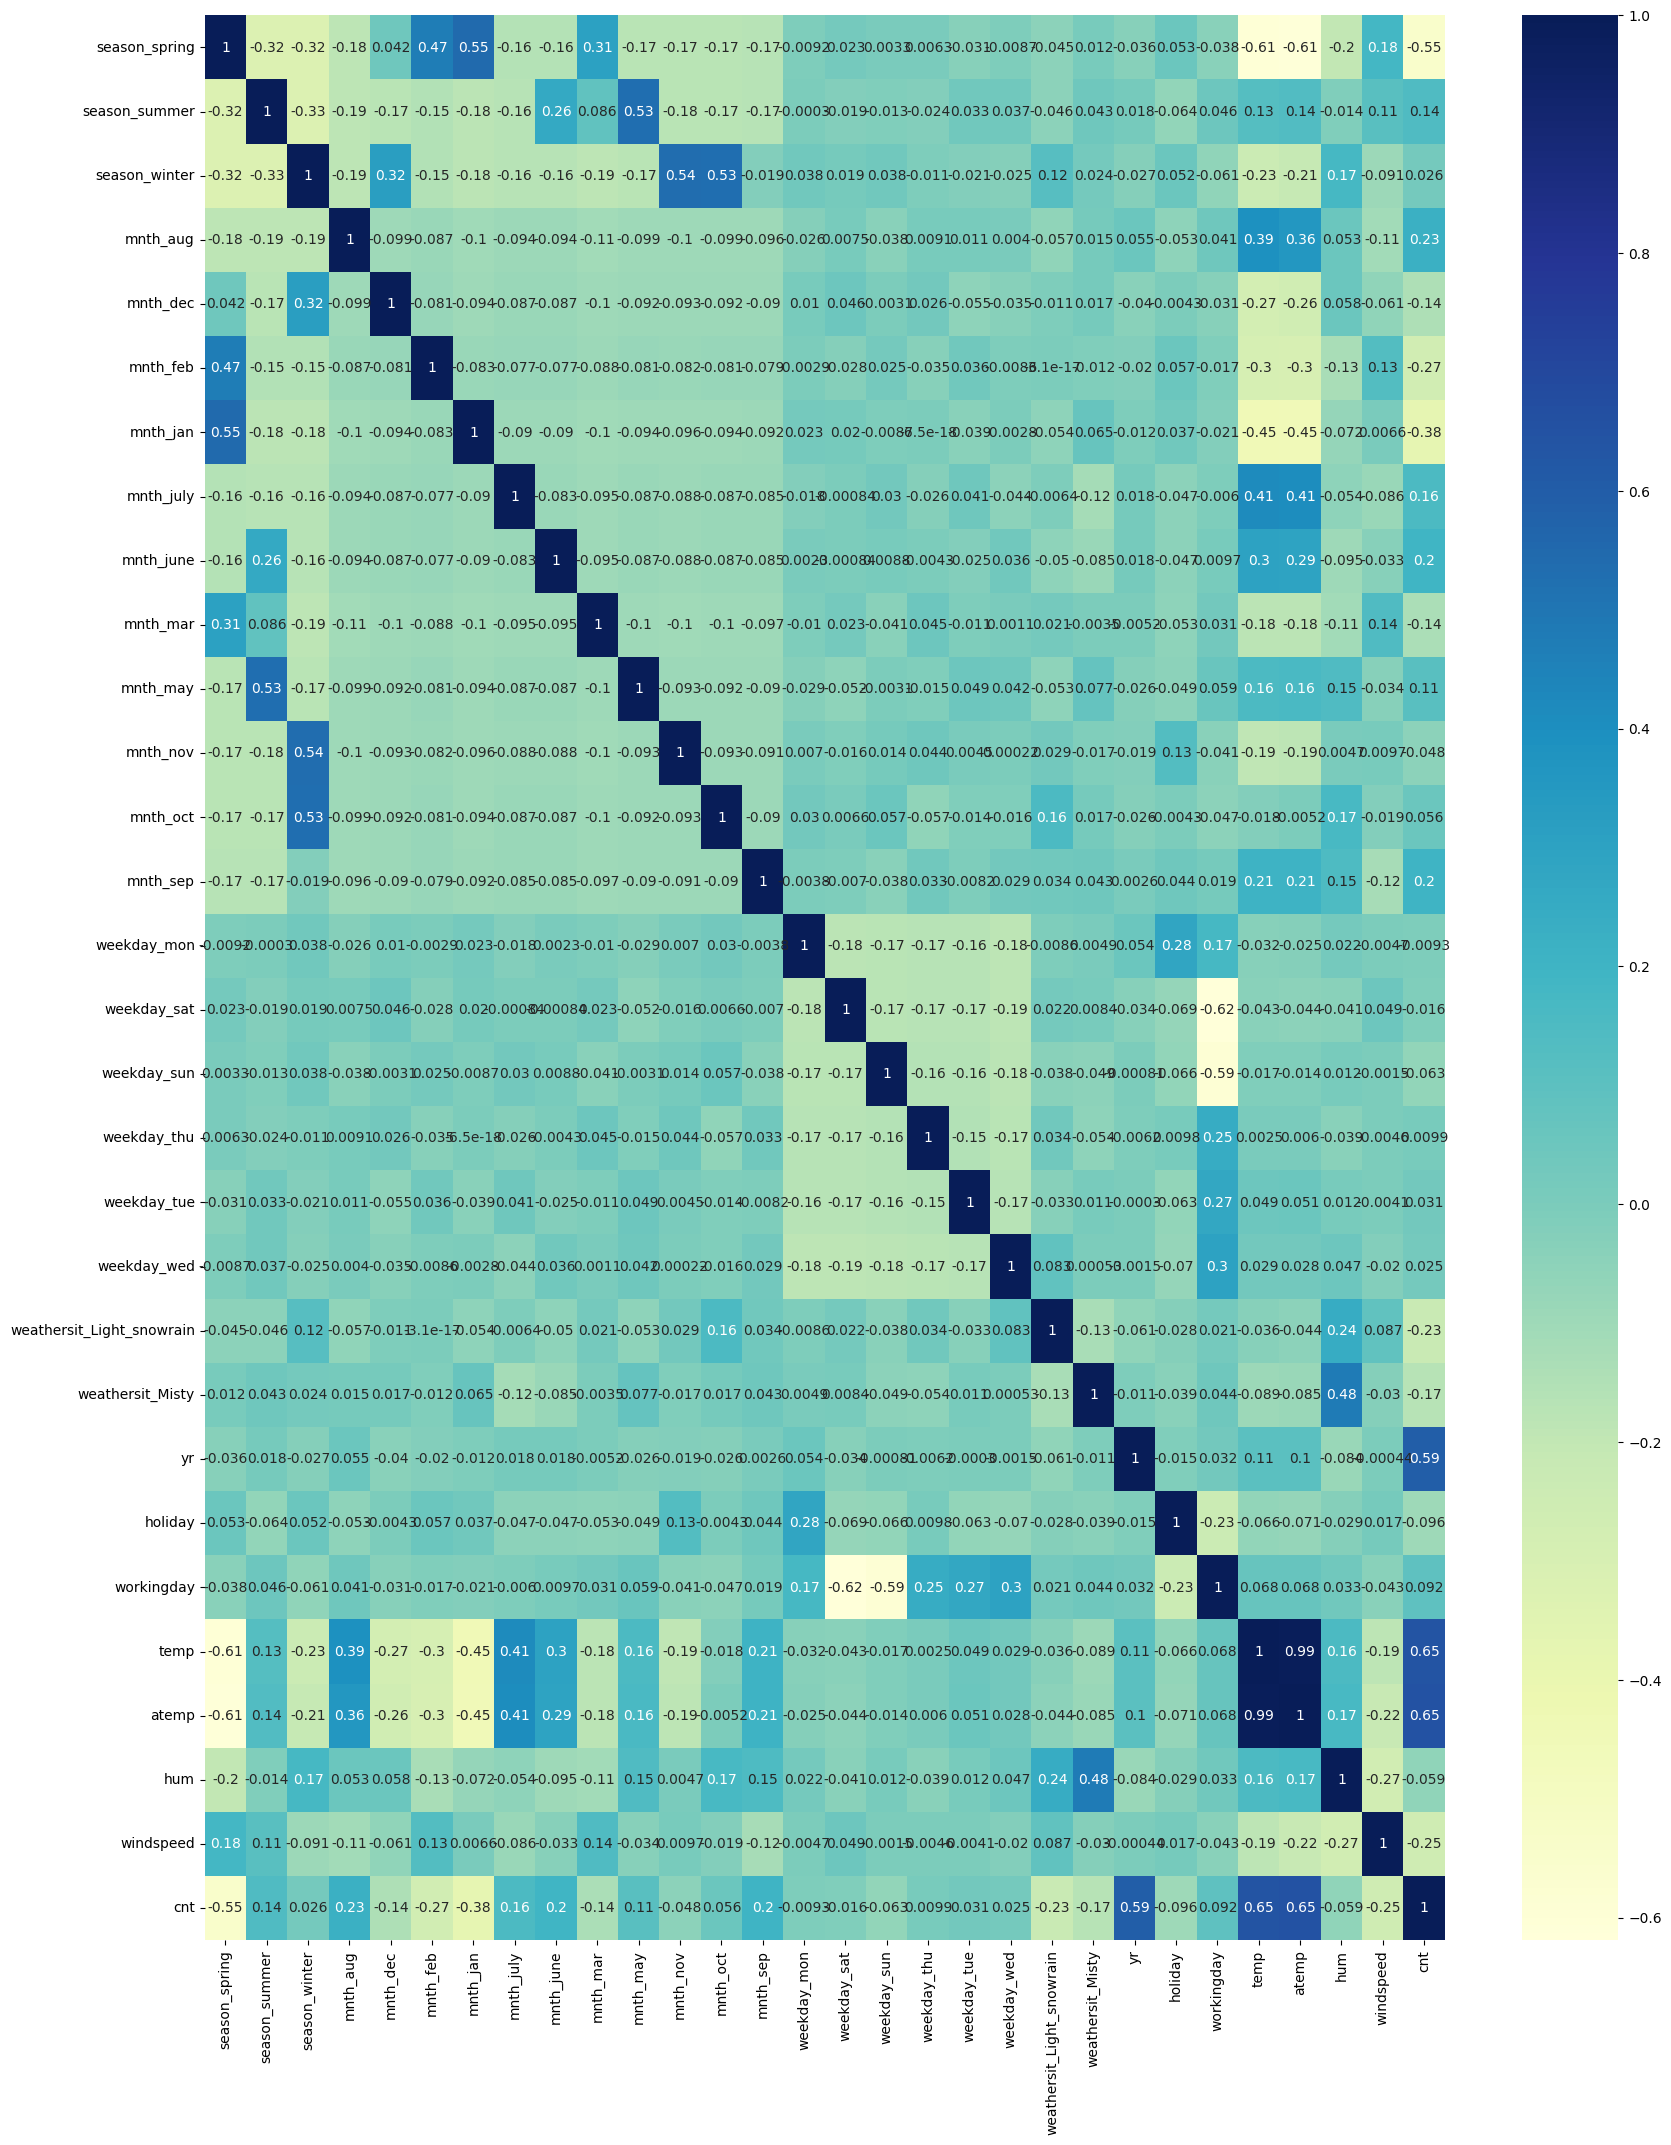

In [86]:
plt.figure(figsize = (20, 25))
sns.heatmap(train.corr(), annot = True, cmap="YlGnBu")
plt.show()

 Inference:

As can be seen from the map, atemp and temp seems to be correlated to the target variable cnt. Since, not much can be stated about the other independent variables , hence we'll build a model using all the columns

Dividing into X and Y sets for the model building

In [87]:
y_train = train.pop('cnt')
X_train = train

In [88]:
y_train.shape

(510,)

#Step 6: Building a linear model

**APPROACH USED** :

We will use a mixed approach to build the model.
Here we are using RFE approach for feature selection and then we will use the statsmodel approach for building the model
Feature Selection

We start with 15 variables.
We need to use the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)


In [89]:
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [90]:
# Running RFE with the output number of the variable equal to 15

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

In [91]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('season_spring', False, 7),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', True, 1),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 3),
 ('mnth_jan', True, 1),
 ('mnth_july', False, 14),
 ('mnth_june', False, 8),
 ('mnth_mar', False, 11),
 ('mnth_may', False, 6),
 ('mnth_nov', False, 2),
 ('mnth_oct', False, 13),
 ('mnth_sep', True, 1),
 ('weekday_mon', False, 9),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 4),
 ('weekday_thu', False, 12),
 ('weekday_tue', False, 10),
 ('weekday_wed', False, 15),
 ('weathersit_Light_snowrain', True, 1),
 ('weathersit_Misty', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [92]:
col = X_train.columns[rfe.support_]
col

Index(['season_summer', 'season_winter', 'mnth_aug', 'mnth_dec', 'mnth_jan',
       'mnth_sep', 'weekday_sat', 'weathersit_Light_snowrain',
       'weathersit_Misty', 'yr', 'holiday', 'workingday', 'temp', 'hum',
       'windspeed'],
      dtype='object')

In [93]:
X_train.columns[~rfe.support_]

Index(['season_spring', 'mnth_feb', 'mnth_july', 'mnth_june', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'weekday_mon', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed', 'atemp'],
      dtype='object')

#Building model using statsmodel for the detailed statistics

In [94]:
# Creating X_train dataframe with RFE selected variables

X_train_rfe = X_train[col]

Adding a constant variable

For statsmodels, we need to explicitly fit a constant using sm.add_constant(X) because if we don't perform this step, statsmodels fits a regression line passing through the origin, by default.


In [95]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_rfe)

In [96]:
X_train_lm.head()

,const,season_summer,season_winter,mnth_aug,mnth_dec,mnth_jan,mnth_sep,weekday_sat,weathersit_Light_snowrain,weathersit_Misty,yr,holiday,workingday,temp,hum,windspeed
576,1.0,False,False,False,False,False,False,False,False,False,1,0,1,0.815169,0.725633,0.264686
426,1.0,False,False,False,False,False,False,True,False,True,1,0,0,0.442393,0.640189,0.255342
728,1.0,False,False,False,True,False,False,False,False,False,1,0,0,0.245101,0.498067,0.663106
482,1.0,True,False,False,False,False,False,True,False,True,1,0,0,0.395666,0.504508,0.188475
111,1.0,True,False,False,False,False,False,False,False,True,0,0,1,0.345824,0.751824,0.380981


#Building the first linear models using statsmodels

In [97]:
X_train_lm = X_train_lm.apply(pd.to_numeric, errors='coerce')
y_train = pd.to_numeric(y_train, errors='coerce')


In [98]:
X_train_lm = X_train_lm.dropna()
y_train = y_train.dropna()

In [99]:
X_train_lm = pd.get_dummies(X_train_lm, drop_first=True)

In [100]:
X_train_lm = np.asarray(X_train_lm, dtype='float64')
y_train = np.asarray(y_train, dtype='float64')

In [101]:
import statsmodels.api as sm

lm_1 = sm.OLS(y_train, X_train_lm).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     183.8
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          5.41e-191
Time:                        07:07:52   Log-Likelihood:                 519.39
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2115      0.030      7.049      0.0

 Inference :

Here we see that the p-value for all the variables is < 0.05 . Hence, we keep all the columns and check VIF.


Checking VIF for multicollinearity

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating VIF is:
𝑉𝐼𝐹𝑖=11−𝑅𝑖2


In [102]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [103]:
print(X_train.columns)

Index(['season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_july', 'mnth_june',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_Light_snowrain',
       'weathersit_Misty', 'yr', 'holiday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed'],
      dtype='object')


In [104]:
print(X_train_rfe.info())

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 576 to 520
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   season_summer              510 non-null    bool   
 1   season_winter              510 non-null    bool   
 2   mnth_aug                   510 non-null    bool   
 3   mnth_dec                   510 non-null    bool   
 4   mnth_jan                   510 non-null    bool   
 5   mnth_sep                   510 non-null    bool   
 6   weekday_sat                510 non-null    bool   
 7   weathersit_Light_snowrain  510 non-null    bool   
 8   weathersit_Misty           510 non-null    bool   
 9   yr                         510 non-null    int64  
 10  holiday                    510 non-null    int64  
 11  workingday                 510 non-null    int64  
 12  temp                       510 non-null    float64
 13  hum                        510 non-null    float64
 1

In [105]:
X_train_rfe = X_train_rfe.apply(pd.to_numeric, errors='coerce')

In [106]:
print(X_train_rfe.info())

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 576 to 520
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   season_summer              510 non-null    bool   
 1   season_winter              510 non-null    bool   
 2   mnth_aug                   510 non-null    bool   
 3   mnth_dec                   510 non-null    bool   
 4   mnth_jan                   510 non-null    bool   
 5   mnth_sep                   510 non-null    bool   
 6   weekday_sat                510 non-null    bool   
 7   weathersit_Light_snowrain  510 non-null    bool   
 8   weathersit_Misty           510 non-null    bool   
 9   yr                         510 non-null    int64  
 10  holiday                    510 non-null    int64  
 11  workingday                 510 non-null    int64  
 12  temp                       510 non-null    float64
 13  hum                        510 non-null    float64
 1

In [107]:
X_train_rfe = X_train_rfe.astype('float64')

In [108]:
print(X_train_rfe.info())

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 576 to 520
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   season_summer              510 non-null    float64
 1   season_winter              510 non-null    float64
 2   mnth_aug                   510 non-null    float64
 3   mnth_dec                   510 non-null    float64
 4   mnth_jan                   510 non-null    float64
 5   mnth_sep                   510 non-null    float64
 6   weekday_sat                510 non-null    float64
 7   weathersit_Light_snowrain  510 non-null    float64
 8   weathersit_Misty           510 non-null    float64
 9   yr                         510 non-null    float64
 10  holiday                    510 non-null    float64
 11  workingday                 510 non-null    float64
 12  temp                       510 non-null    float64
 13  hum                        510 non-null    float64
 1

In [109]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_rfe.values, i), 2) for i in range(X_train_rfe.shape[1])]

vif.sort_values(by = 'VIF', ascending=False)

,Features,VIF
13,hum,21.09
12,temp,12.48
11,workingday,5.12
14,windspeed,3.84
8,weathersit_Misty,2.18
1,season_winter,2.08
9,yr,2.05
0,season_summer,2.00
6,weekday_sat,1.94
4,mnth_jan,1.64


In general we want VIF to be less than 5. We will drop feature hum which has highest VIF of 21.09

In [110]:
# dropping season_Spring since its vif > 5

X_train_rfe = X_train_rfe.drop(['hum'], axis=1)

#Model 2

In [111]:
X_train_lm = sm.add_constant(X_train_rfe)
lm_2 = sm.OLS(y_train, X_train_lm).fit()
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.4
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          1.93e-188
Time:                        07:07:52   Log-Likelihood:                 510.55
No. Observations:                 510   AIC:                            -991.1
Df Residuals:                     495   BIC:                            -927.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.1258      0.022      5.658      0.000       0.082       0.169
season_summer                 0.0905      0.011      7.977      0.000       0.068       0.113
season_winter                 0.1296      0.011     11.283      0.000       0.107       0.152
mnth_aug                      0.0482      0.016      2.954      0.003       0.016       0.080
mnth_dec                     -0.0289      0.016     -1.794      0.073      -0.061       0.003
mnth_jan                     -0.0503      0.018     -2.802      0.005      -0.086      -0.015
mnth_sep                      0.1087      0.016      6.698      0.000       0.077       0.141
weekday_sat                   0.0586      0.015      3.978      0.000       0.030       0.088
weathersit_Light_snowrain    -0.2913      0.024    -11.980      0.000      -0.339      -0.244
weathersit_Misty             -0.0821      0.009     -9.500      0.000      -0.099      -0.065
yr                            0.2336      0.008     28.940      0.000       0.218       0.249
holiday                      -0.0559      0.027     -2.046      0.041      -0.110      -0.002
workingday                    0.0470      0.012      4.022      0.000       0.024       0.070
temp                          0.4801      0.025     19.225      0.000       0.431       0.529
windspeed                    -0.1632      0.025     -6.542      0.000      -0.212      -0.114
==============================================================================
Omnibus:                       66.586   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.347
Skew:                          -0.684   Prob(JB):                     2.50e-35
Kurtosis:                       5.372   Cond. No.                         14.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [112]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_rfe.values, i), 2) for i in range(X_train_rfe.shape[1])]

vif.sort_values(by = 'VIF', ascending=False)

,Features,VIF
12,temp,6.54
11,workingday,4.80
13,windspeed,3.70
9,yr,2.05
0,season_summer,1.93
6,weekday_sat,1.88
1,season_winter,1.74
2,mnth_aug,1.60
8,weathersit_Misty,1.58
4,mnth_jan,1.34


 Inference :

Now as you can see, the VIFs and p-values both are within an acceptable range. Hence, we finalise lm_2 as the final model to proceed with the future prdeictions

#Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [113]:
y_train_pred = lm_2.predict(X_train_lm)

<ipython-input-114-eb26009951e6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_pred), bins = 20)


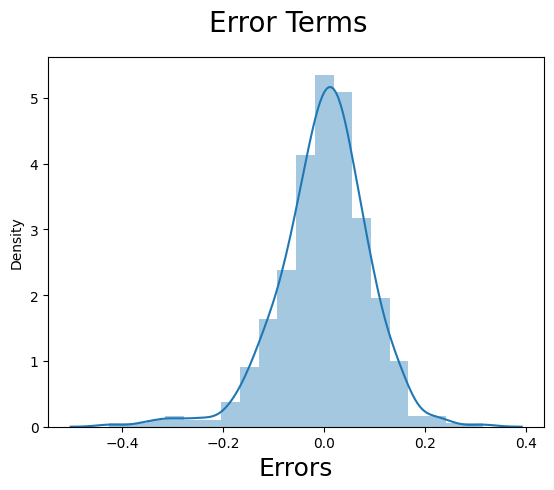

In [114]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

 Inference:

We can clearly see that the error terms are centred around 0 and follows a normal distribution, this is in accordance with the stated assumptions of linear regression.


Cross-verifying the above conclusion using a qq-plot as well:

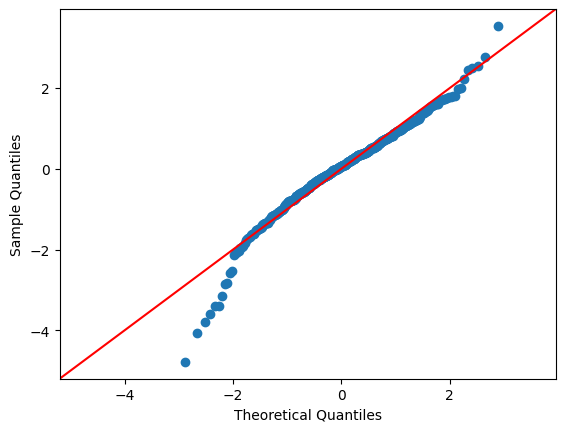

In [115]:
# Plot the qq-plot of the error terms

sm.qqplot((y_train - y_train_pred), fit=True, line='45')
plt.show()

Inference:

Here we see that most of the data points lie on the straight line , which indicates that the error terms are normally distributed .


#Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model that we got.
Applying the scaling on the test sets


In [116]:
num_vars = ['cnt','hum','windspeed','temp','atemp']

test[num_vars] = scaler.transform(test[num_vars])

In [117]:
test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300


Dividing into X_test and y_test

In [118]:
y_test = test.pop('cnt')
X_test = test

In [119]:
# Making predictions using the final model

X_test = sm.add_constant(X_test[X_train_rfe.columns])
y_test_pred = lm_2.predict(X_test)

Calculating the r-squared

R-squared is a goodness-of-fit measure for linear regression models. This statistic indicates the percentage of the variance in the dependent variable that the independent variables explain collectively. R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale.


In [120]:
from sklearn.metrics import r2_score
print('r2_score of train dataset', r2_score(y_train, y_train_pred))
print('r2_score of test dataset', r2_score(y_test, y_test_pred))

r2_score of train dataset 0.8427028999308434
r2_score of test dataset 0.7984022986634717


 Inference:

We can see that the r_squared on the test set is 0.798 and the r-squared on the trained set 0.842 which is quiet reasonable and nearly equal, which means that whatever data the model was trained with, it has been almost able to apply those learnings in the test data.


#Step 9: Model Evaluation

Plotting the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

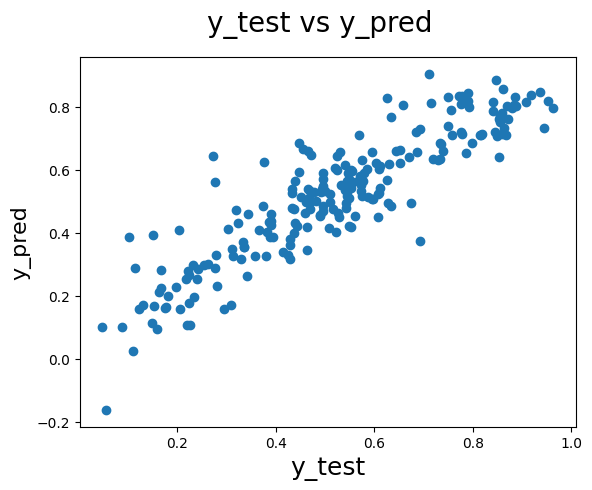

In [121]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

Inference:

We can colude that the final model fit isn't by chance, and has descent predictive power.


Getting the variable names and the coefficient values for the final equation of the best fitted line

In [122]:
param = pd.DataFrame(lm_2.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,15))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param

,Variables,Coefficient value
index,,
13,temp,0.480127
10,yr,0.233612
2,season_winter,0.129575
0,const,0.125750
6,mnth_sep,0.108661
1,season_summer,0.090464
7,weekday_sat,0.058578
3,mnth_aug,0.048223
12,workingday,0.047034


 Final Conclusions :

By using the above scatter plot and the table , We can see that the equation of our best fitted line is:

𝑐𝑛𝑡=0.125+0.4801×𝑡𝑒𝑚𝑝+0.2336×𝑦𝑟+0.1295×𝑠𝑒𝑎𝑠𝑜𝑛𝑊𝑖𝑛𝑡𝑒𝑟+0.1086×𝑚𝑛𝑡ℎ𝑆𝑒𝑝𝑡+0.0904×𝑠𝑒𝑎𝑠𝑜𝑛𝑆𝑢𝑚𝑚𝑒𝑟−0.0288×𝑚𝑛𝑡ℎ𝐷𝑒𝑐−0.0503×𝑚𝑛𝑡ℎ𝐽𝑎𝑛−0.0820×𝑤𝑒𝑎𝑡ℎ𝑒𝑟𝑠𝑖𝑡𝑀𝑖𝑠𝑡𝐶𝑙𝑜𝑢𝑑𝑦−0.0559×ℎ𝑜𝑙𝑖𝑑𝑎𝑦−0.1631×𝑤𝑖𝑛𝑑𝑠𝑝𝑒𝑒𝑑−0.2913×𝑤𝑒𝑎𝑡ℎ𝑒𝑟𝑠𝑖𝑡𝐿𝑖𝑔ℎ𝑡𝑆𝑛𝑜𝑤𝑅𝑎𝑖𝑛

All the positive coefficients like temp,season_Summer indicate that an increase in these values will lead to an increase in the value of cnt.
All the negative coefficients indicate that an increase in these values will lead to a decrease in the value of cnt.

    From R-Sqaured and adj R-Sqaured value of both train and test dataset we could conclude that the above variables can well explain more than 81% of bike demand.

    Coeffiencients of the variables explains the factors effecting the bike demand

    Based on final model top three features contributing significantly towards explaining the demand are:

    Temperature (0.480127)

    weathersit : Light Snow, Light Rain + Mist & Cloudy (-0.291342)

    year (0.233612)

Hence, it can be clearly concluded that the variables temperature , season/ weather situation and month are significant in predicting the demand for shared bikes .


# Final Recommendations for the Company:

    
    With an increase in temperature the demand also increases, hence it should keep track of the weather conditions.
    During the Winter season the demand rises, hence it should be well prepared to meet the high demand.
    Holiday time seems to be least interesting bor biking, little motavation and marketing might help here.

